In [1]:
import cv2 as cv
import numpy as np
import random
from matplotlib import pyplot as plt


def img2bipolar(img, thresh):
    """
    changing image to bipolar vector for better processing
    :param img: input array of grayscale image
    :param thresh: threshold value to perform bipolarization :)
    :return: bipolar vector of input image
    """
    _, thresh1 = cv.threshold(img, thresh, 255, cv.THRESH_BINARY)
    thresh1 = np.where(thresh1 == 0, -1, 1)
    return thresh1


def bipolar2img(data):
    """
    converting the bipolar image to [1 255] scale for better visualization
    :param data: bipolar image vector
    :return: scaled image vector ready to visualize
    """
    # data is 1 or -1 matrix
    y = np.zeros(data.shape, dtype=np.uint8)
    y[data == 1] = 255
    y[data == -1] = 0
    return y


def mat2vec(x):
    """
    converting image matrix to 1D array
    :param x: input 2D numpy array
    :return: 1D converted vector
    """
    m = x.shape[0] * x.shape[1]
    vec = np.zeros(m)
    p = 0
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            vec[p] = x[i, j]
            p += 1
    return vec


def vec2mat(vec, w, h):
    """
    converting the image vector to matrix for plotting
    :param vec: array of image
    :param w: width
    :param h: height
    :return: returns a matrix of input vector
    """
    return vec.reshape(w, h)


def create_w(x):
    """
    creates wight matrix with zero diagonal elements
    :param x: input bipolar vector of train image
    :return: weight matrix
    """
    if len(x.shape) != 1:
        print("The input is not vector")
        return
    else:
        w = np.zeros([len(x), len(x)])
        for i in range(len(x)):
            for j in range(i, len(x)):
                if i == j:
                    w[i, j] = 0
                else:
                    w[i, j] = x[i] * x[j]
                    w[j, i] = w[i, j]
    return w


def iteration(test_vector, weight_mat, theta=0.5, iteration=1000):
    """
    :param test_vector: bipolar vector of test image
    :param weight_mat: created weight matrix based on training image
    :param theta: threshold of the neuron
    :param iteration: iteration or epoch
    :return: the recalled test image vector 
    """

    for _ in range(iteration):
        # choosing random pixels from test vector
        i = random.randint(0, len(test_vector) - 1)
        u = np.dot(weight_mat[i][:], test_vector) - theta

        if u > 0:
            test_vector[i] = 1
        elif u < 0:
            test_vector[i] = -1

    return test_vector


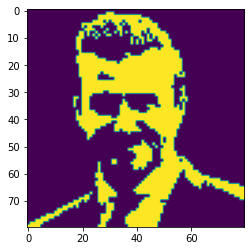

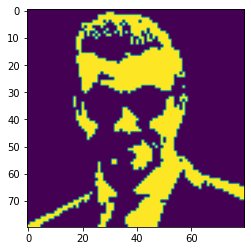

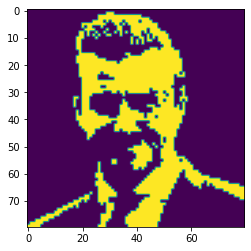

In [2]:

test_img = cv.imread('test.jpg', cv.IMREAD_GRAYSCALE)
train_img = cv.imread('train.jpg', cv.IMREAD_GRAYSCALE)
test_img = cv.resize(test_img, (80, 80))
train_img = cv.resize(train_img, (80, 80))

train = img2bipolar(train_img, 120)
train_vec = mat2vec(train)
plt.imshow(bipolar2img(train))
plt.title('train image')
plt.show()

weight_mat = create_w(train_vec)

test = img2bipolar(test_img, 120)
test_vec = mat2vec(test)
plt.imshow(bipolar2img(test))
plt.title('test image')
plt.show()

final_vec = iteration(test_vector=test_vec,
                      weight_mat=weight_mat,
                      theta=.5,
                      iteration=15000)
plt.imshow(bipolar2img(vec2mat(final_vec, w=80, h=80)))
plt.title('final image after the process')
plt.show()
